In [1]:
#Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
#!pip install plotly

import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization


In [80]:
def sniff(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['Min Value'] = df.apply(lambda x: np.nanmin(x))
        info['Max Value'] = df.apply(lambda x: np.nanmax(x))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [74]:
from pathlib import Path
p = Path().cwd()
print(f"original File path: {p}")
print(p)
#updating to add the data to the file path and removing the current ipynb code library
stringpath= str(p)[0:str(p).rfind('\\')] + '\\data'
print(f"Updated File Path to pick from Data Library: { stringpath}")

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Updated File Path to pick from Data Library: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [4]:
ngsimfile=stringpath + '/' + 'Next_Generation_Simulation__NGSIM__Vehicle_Trajectories_and_Supporting_Data.csv'
ngsim = pd.read_csv(ngsimfile,low_memory=False)

In [81]:
sniffed_data= sniff(ngsim)
sniffed_data

,data type,percent missing,No. unique,Min Value,Max Value,unique values
Vehicle_ID,int64,0.000000,3233,1,3366,"[515, 2224, 2127, 1033, 1890, 744, 879, 2283, ..."
Frame_ID,int64,0.000000,11691,1,11691,"[2330, 6548, 6459, 4827, 9157, 3392, 6336, 800..."
Total_Frames,int64,0.000000,1837,2,2434,"[1123, 1902, 567, 592, 628, 996, 811, 1821, 11..."
Global_Time,int64,0.000000,88516,1163019100,1118937747000,"[1118848075000, 1113437421700, 1118847624800, ..."
Following,int64,0.000000,3234,0,3366,"[523, 2211, 2132, 1040, 1897, 752, 881, 2344, ..."
Preceding,int64,0.000000,3228,0,3366,"[500, 2208, 2124, 1029, 1882, 740, 869, 2330, ..."
v_Class,int64,0.000000,3,1,3,"[2, 3, 1]"
Lane_ID,int64,0.000000,18,0,9999,"[3, 4, 2, 1, 5, 6, 12, 0, 11, 7, 8, 31, 101, 9..."
Space_Headway,float64,0.000000,88292,0.0,1855.75,"[119.1, 53.34, 48.92, 38.81, 102.65, 37.8, 22...."
Movement,float64,79.062482,4,1.0,3.0,"[nan, 1.0, 2.0, 3.0]"


In [22]:
sniffed_data.columns

Index(['data type', 'percent missing', 'No. unique', 'unique values'], dtype='object')

In [24]:
sniffed_data[sniffed_data['No. unique'] <= 1000]

,data type,percent missing,No. unique,unique values
v_Class,int64,0.000000,3,"[2, 3, 1]"
Lane_ID,int64,0.000000,18,"[3, 4, 2, 1, 5, 6, 12, 0, 11, 7, 8, 31, 101, 9..."
Movement,float64,79.062482,4,"[nan, 1.0, 2.0, 3.0]"
Direction,float64,79.062482,5,"[nan, 4.0, 1.0, 2.0, 3.0]"
Section_ID,float64,79.062482,8,"[nan, 3.0, 0.0, 2.0, 4.0, 5.0, 1.0, 6.0]"
Int_ID,float64,79.062482,7,"[nan, 0.0, 2.0, 4.0, 3.0, 1.0, 5.0]"
D_Zone,float64,79.062482,21,"[nan, 201.0, 203.0, 205.0, 208.0, 212.0, 214.0..."
v_Width,float64,0.000000,58,"[6.9, 4.4, 8.5, 5.9, 7.0, 7.4, 7.8, 4.9, 7.9, ..."
v_length,float64,0.000000,362,"[13.0, 14.3, 13.5, 24.0, 15.0, 15.9, 16.2, 15...."
O_Zone,float64,79.062482,23,"[nan, 108.0, 111.0, 102.0, 123.0, 101.0, 115.0..."


In [25]:
sniffed_data[sniffed_data['No. unique'] <= 1000].index

Index(['v_Class', 'Lane_ID', 'Movement', 'Direction', 'Section_ID', 'Int_ID',
       'D_Zone', 'v_Width', 'v_length', 'O_Zone', 'Location'],
      dtype='object')

In [12]:
ngsim.head(3)

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_length,v_Width,...,D_Zone,Int_ID,Section_ID,Direction,Movement,Preceding,Following,Space_Headway,Time_Headway,Location
0,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
1,515,2330,1123,1118848075000,30.034,188.062,6451203.729,1873252.549,13.0,6.9,...,NaN,NaN,NaN,NaN,NaN,500,523,119.10,5.11,us-101
2,2224,6548,1902,1113437421700,41.429,472.901,6042814.264,2133542.012,14.3,6.9,...,NaN,NaN,NaN,NaN,NaN,2208,2211,53.34,2.01,i-80


In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.boxplot(data=ngsim,y='Location')


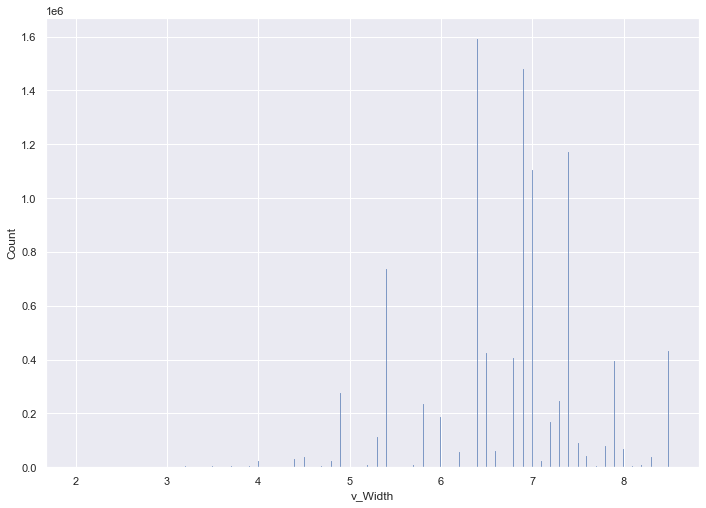

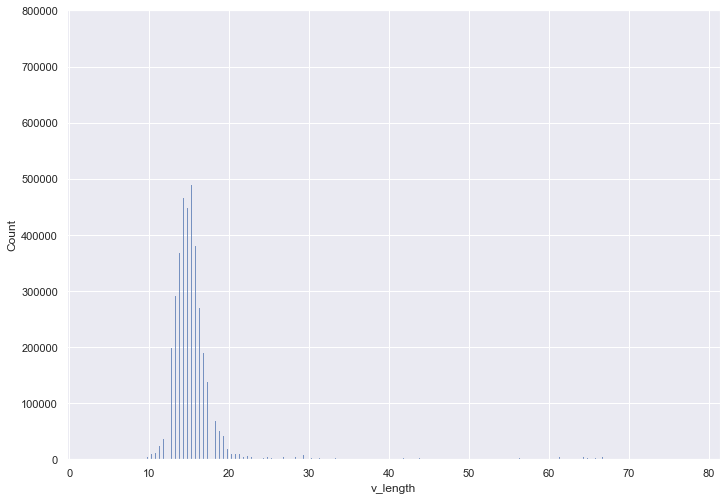

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=ngsim,x='v_Width')
plt.show()
sns.histplot(data=ngsim,x='v_length')
plt.show()

In [79]:
#vehicle_id= ngsim[ngsim['Vehicle_ID'] > 3393]['Vehicle_ID']
#vehicle_id

np.nanmax(ngsim['Movement'])


3.0

# keep the below ones in EDA. 

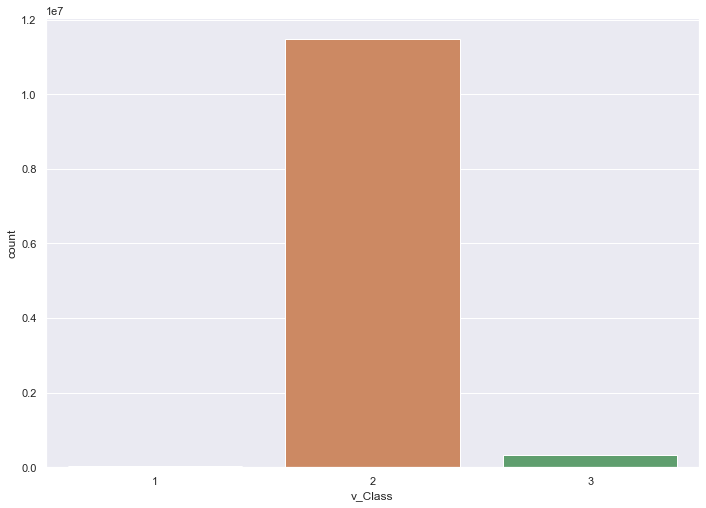

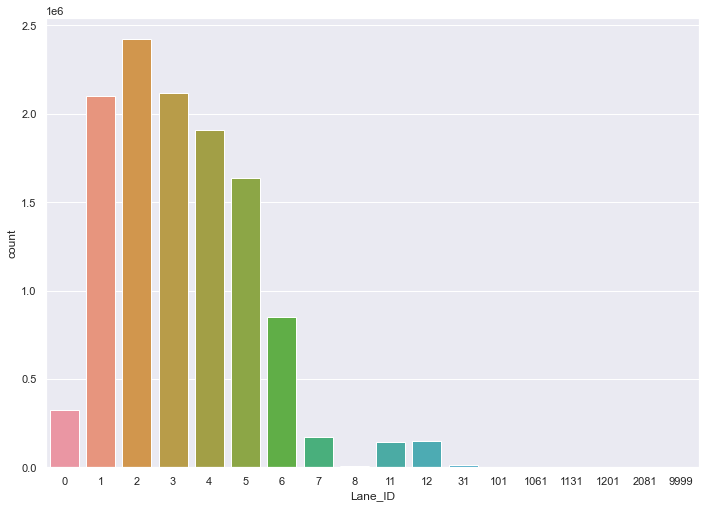

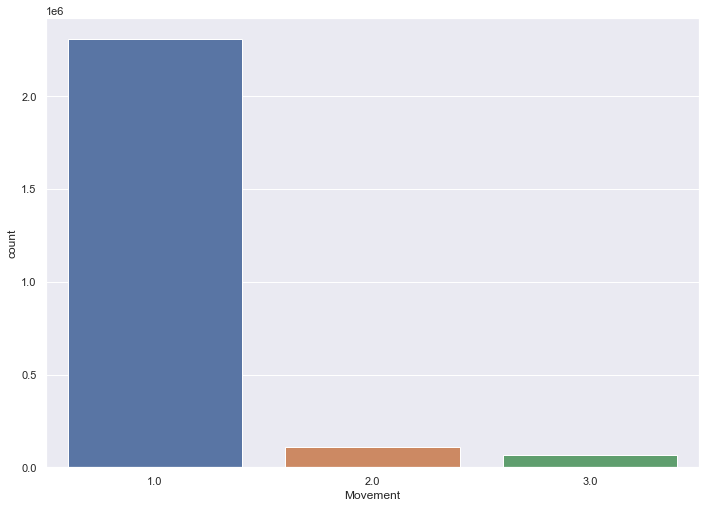

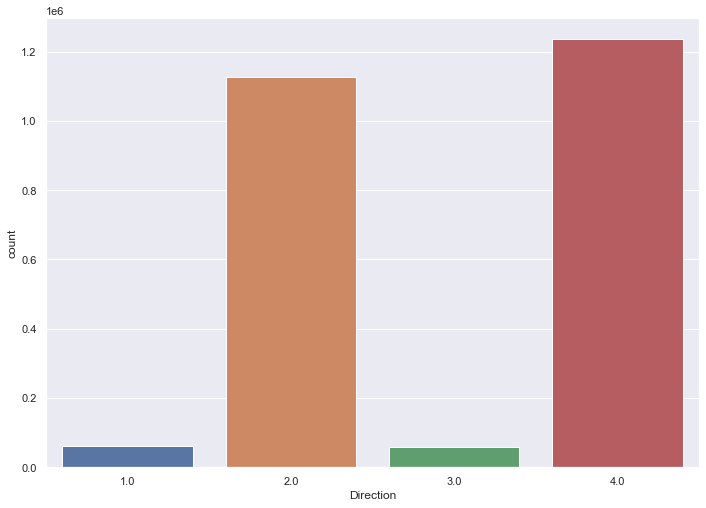

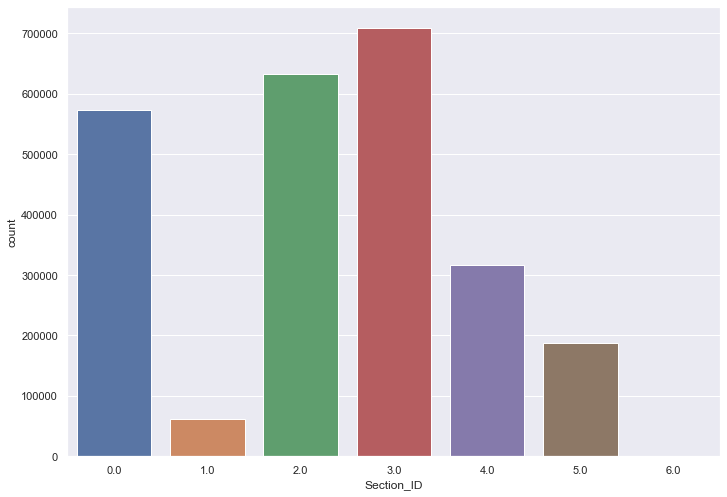

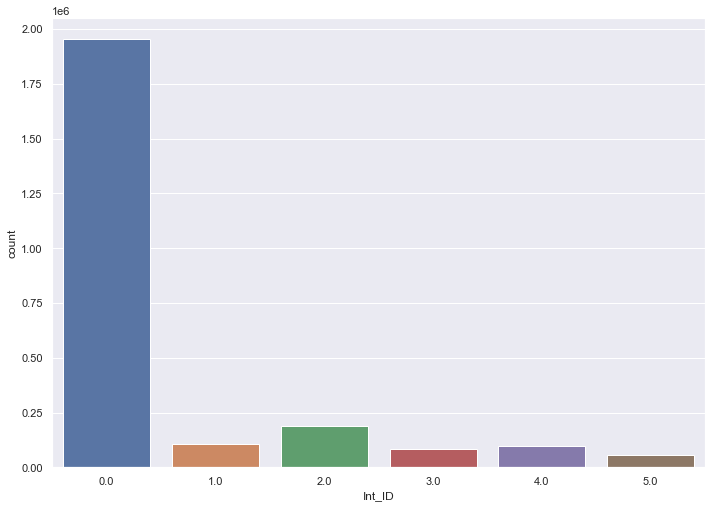

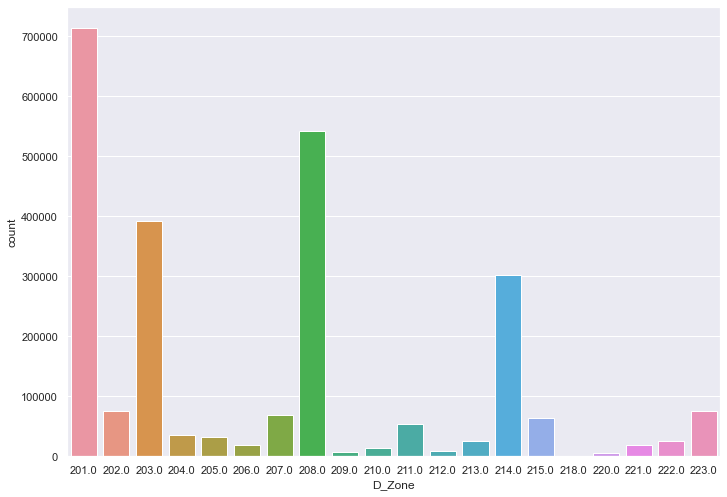

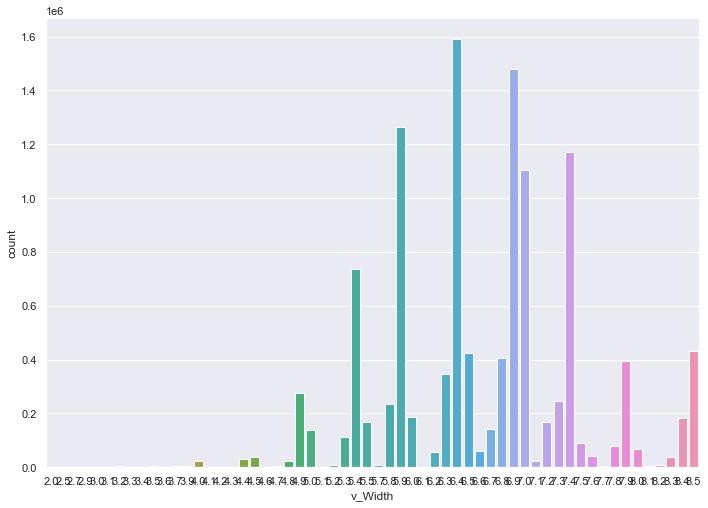

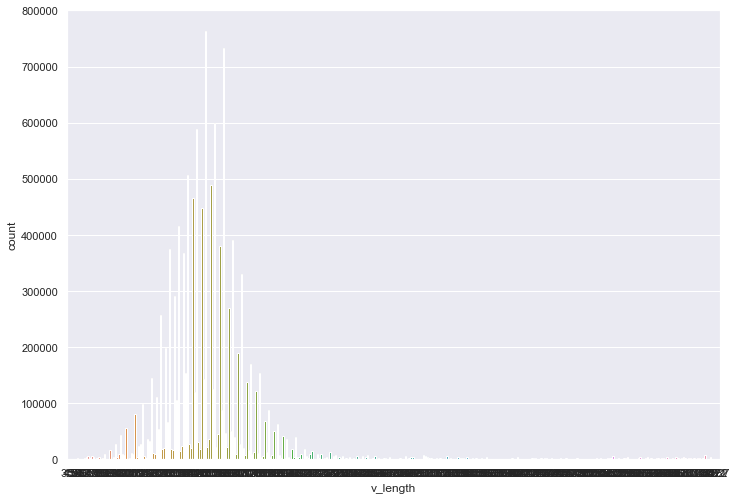

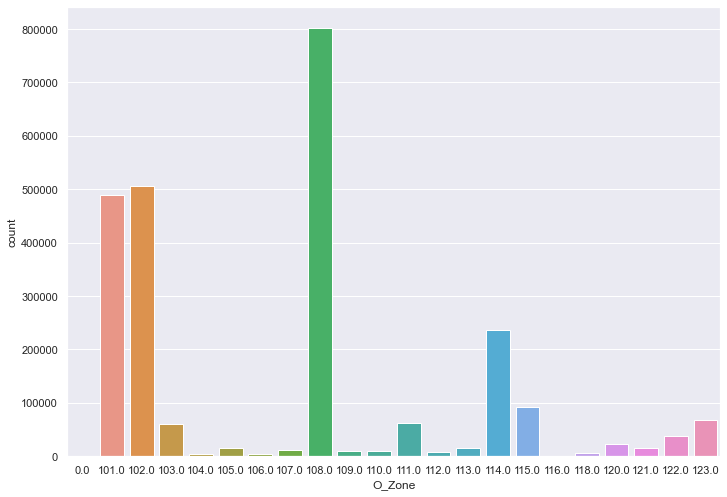

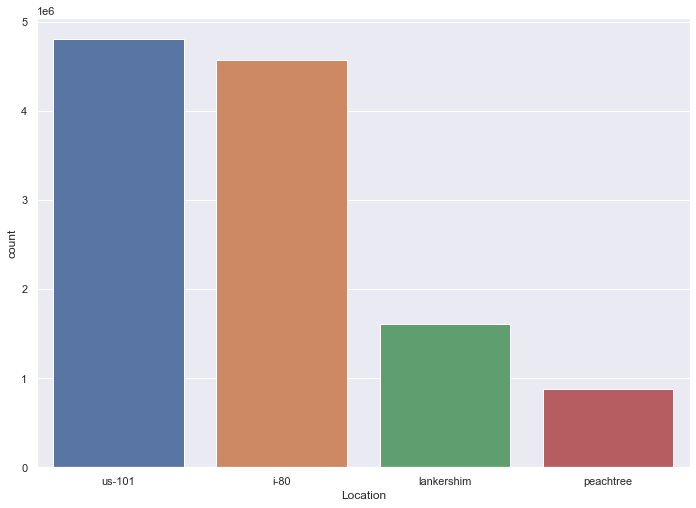

In [35]:

for column in sniffed_data[sniffed_data['No. unique'] <= 1000].index:
    #print(col)
    sns.countplot(data=ngsim,x=column)
    plt.show()  

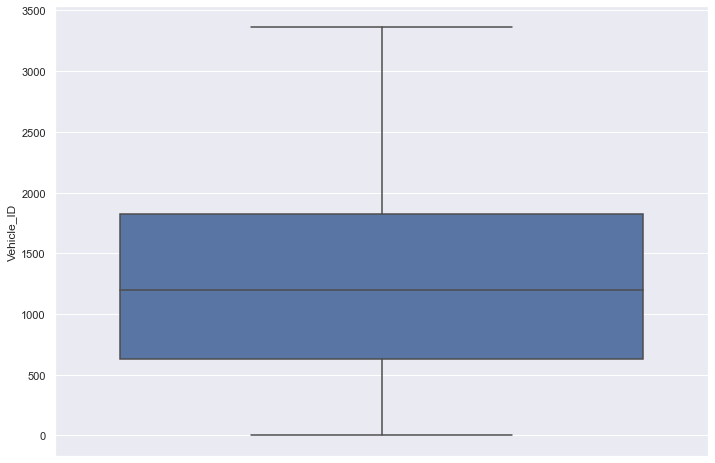

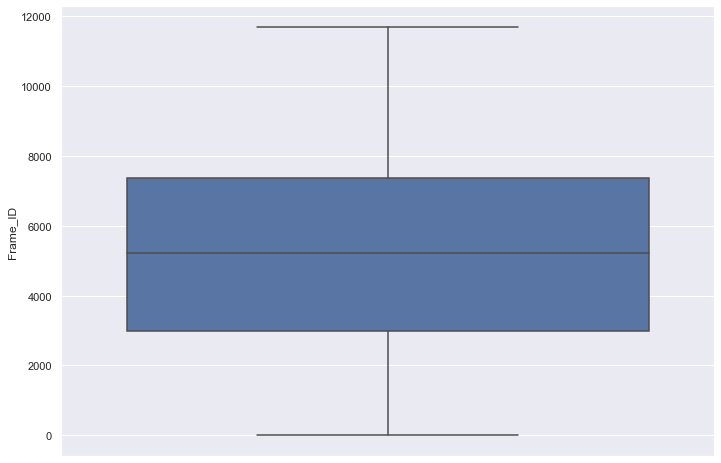

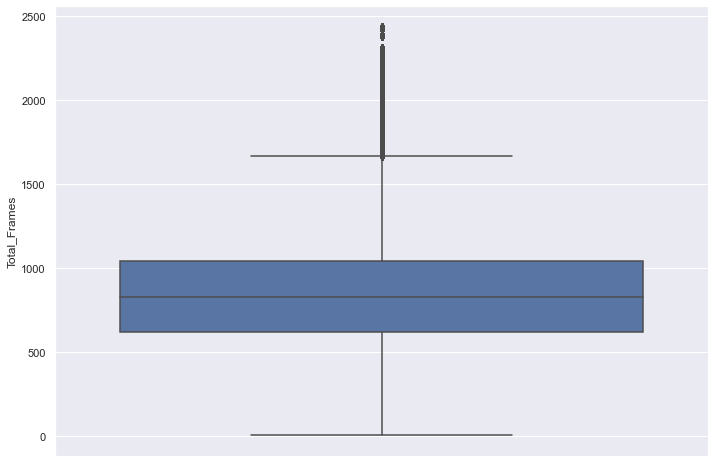

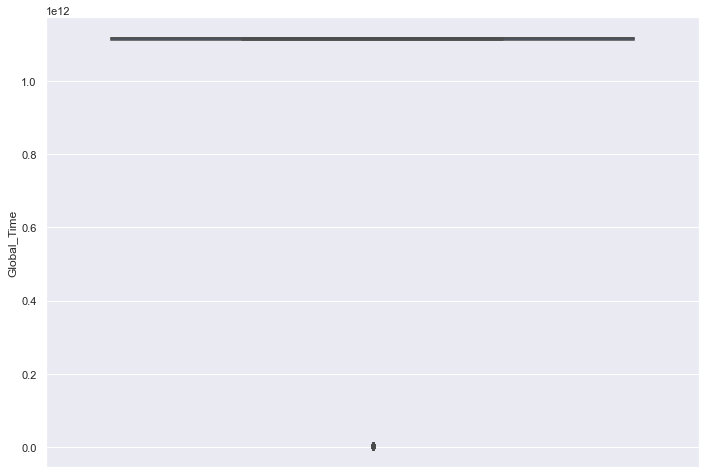

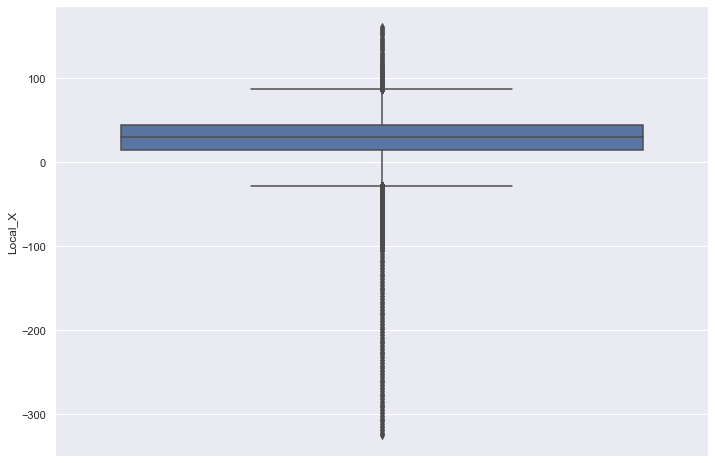

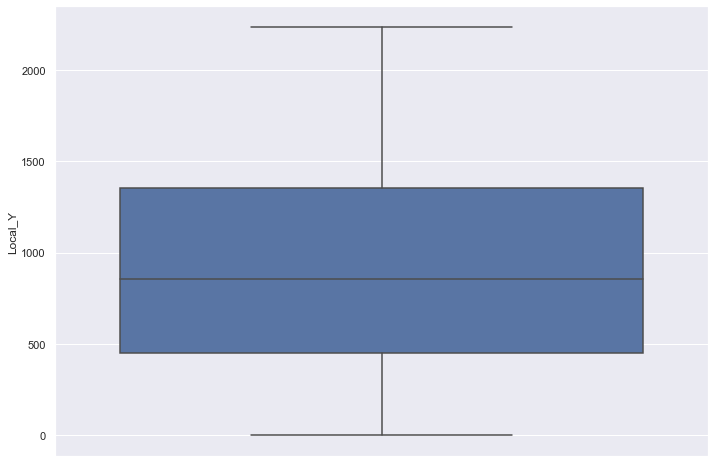

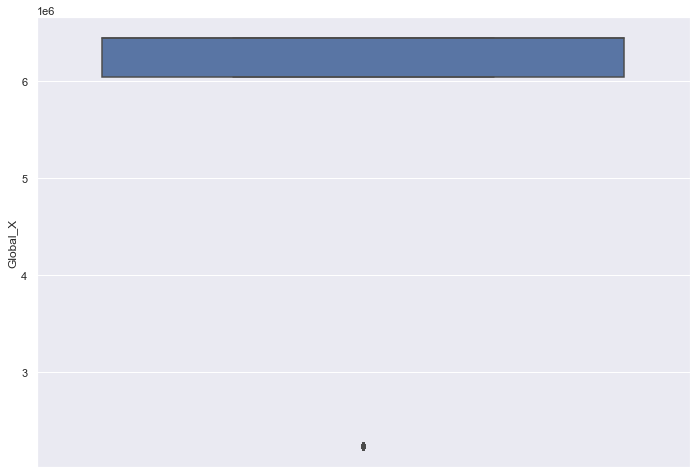

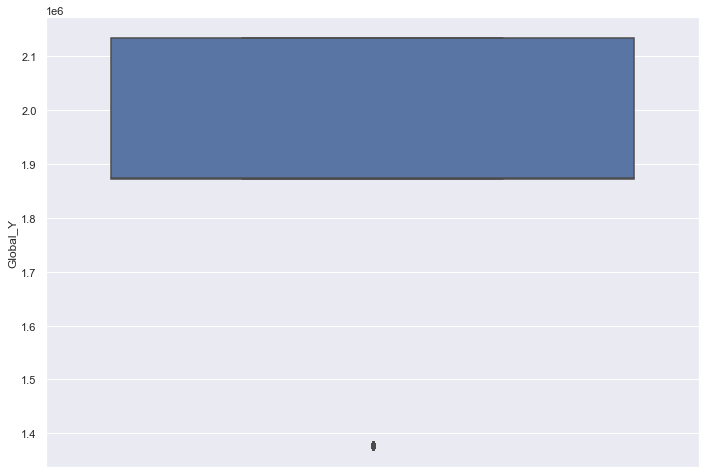

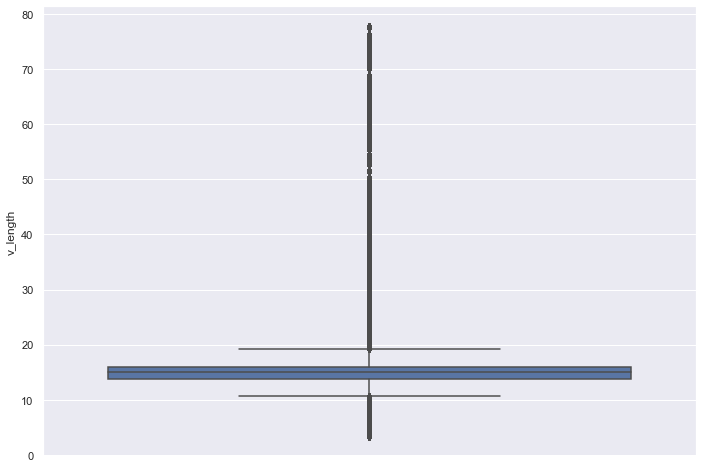

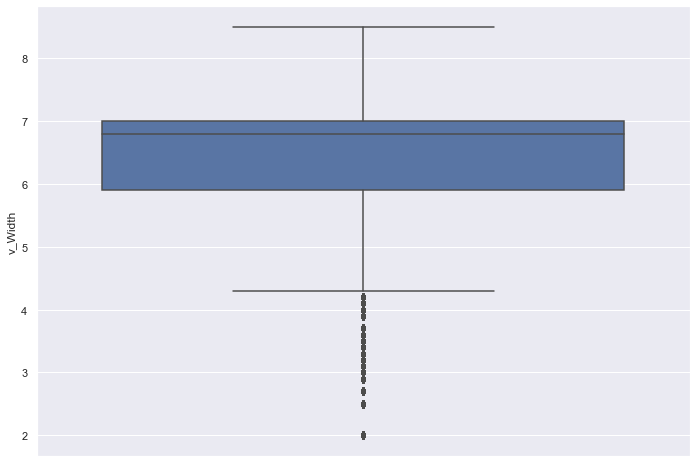

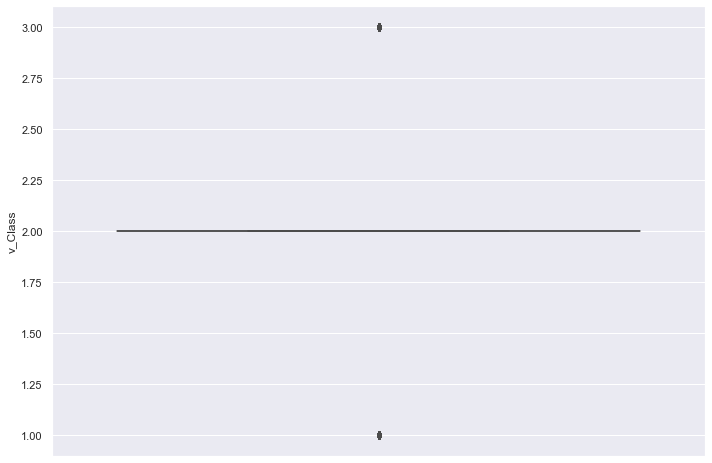

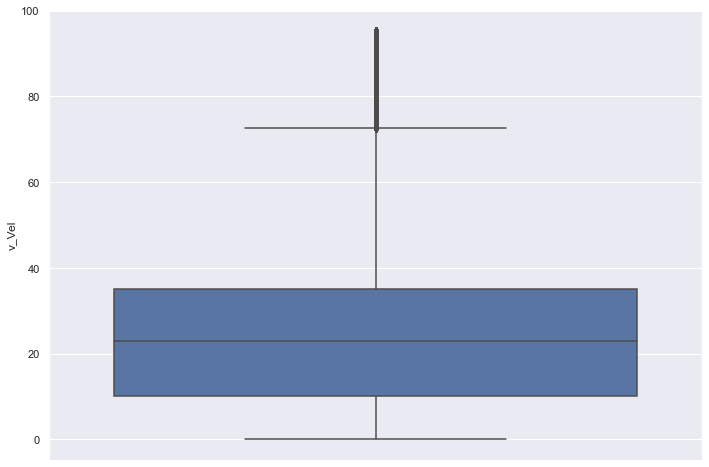

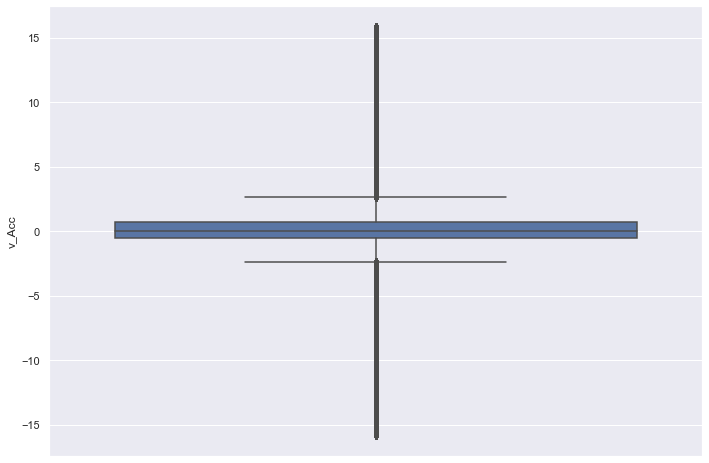

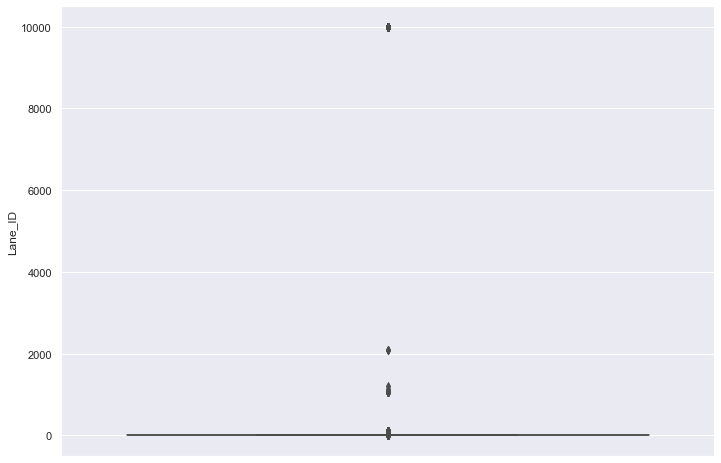

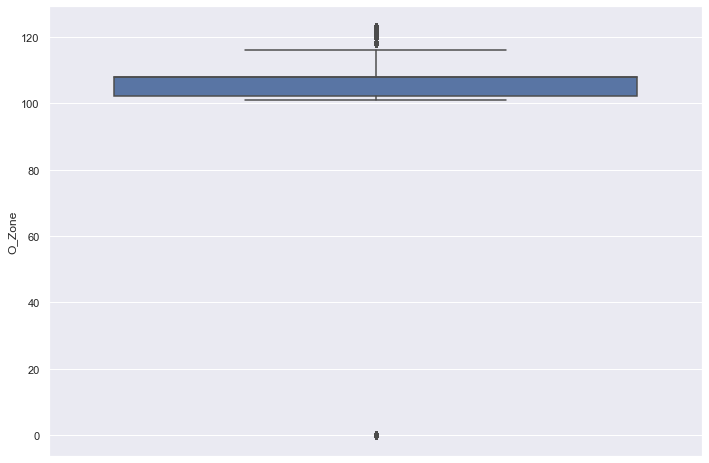

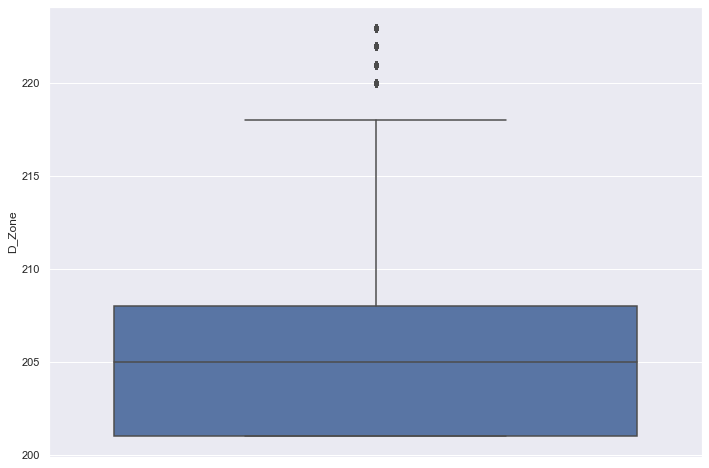

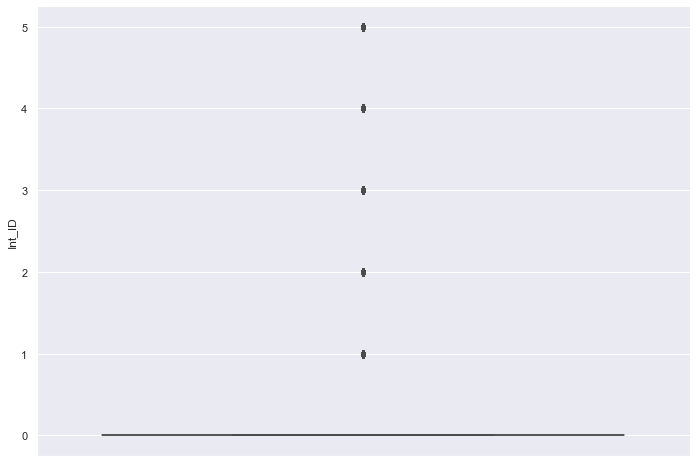

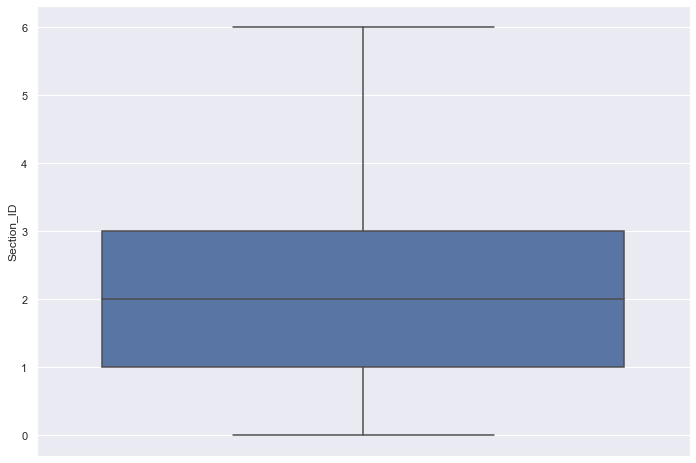

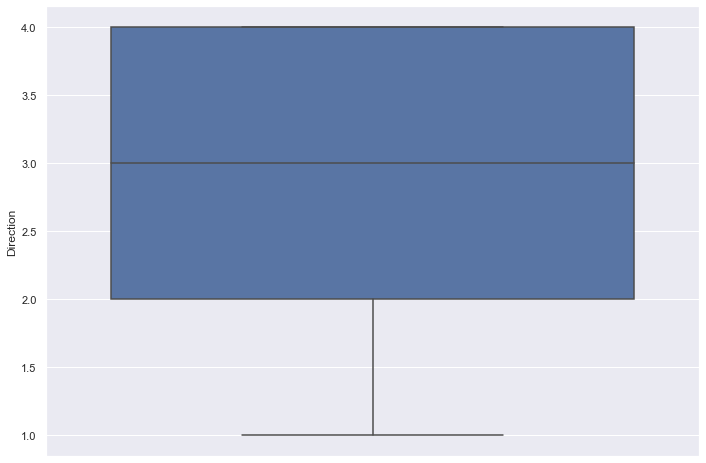

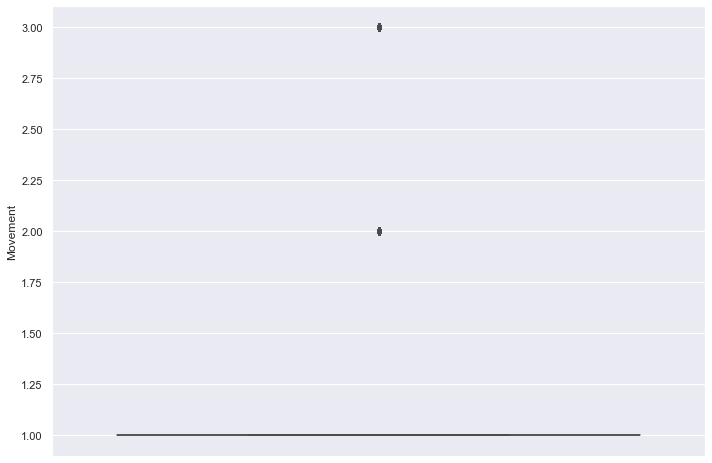

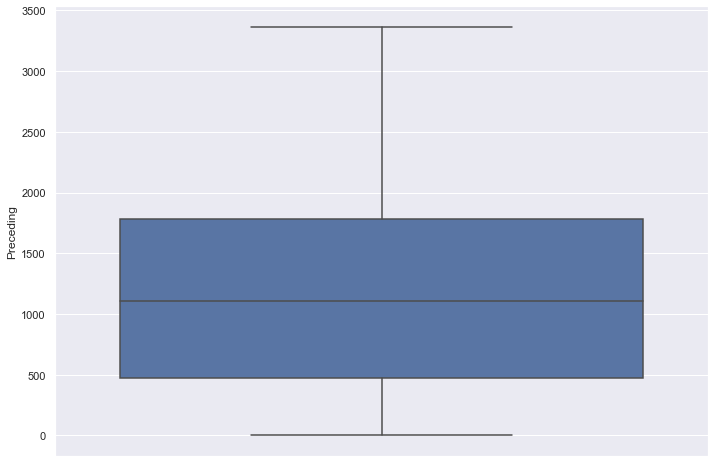

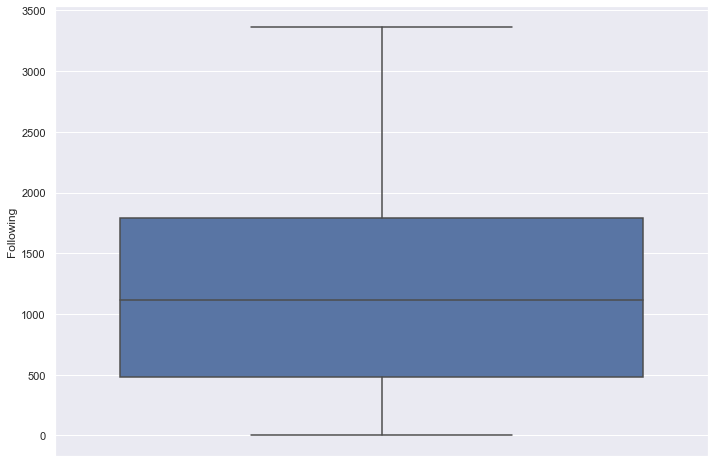

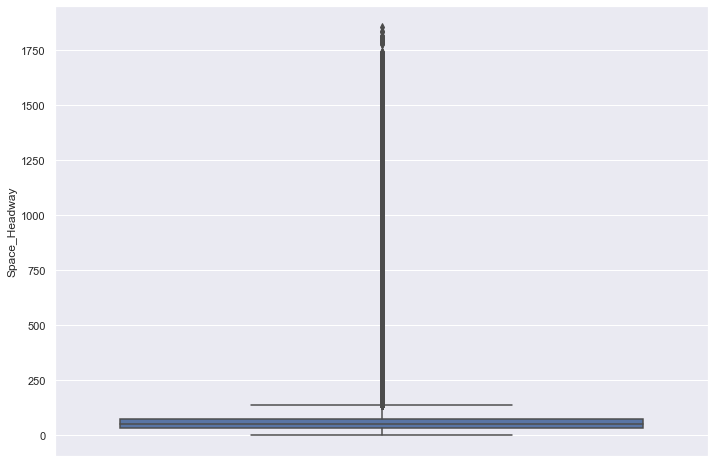

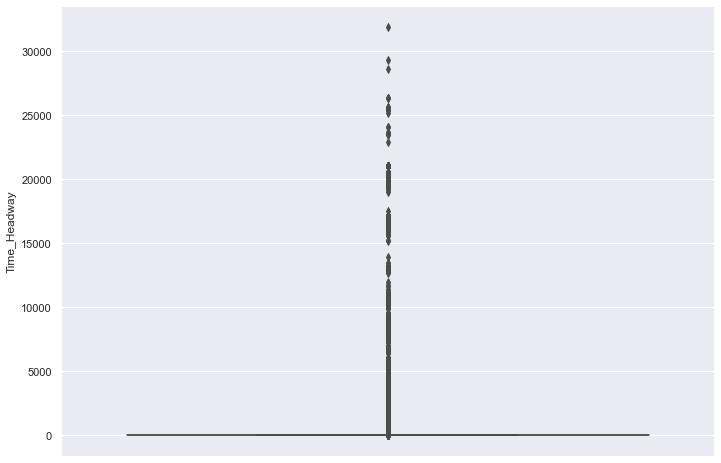

In [48]:

for column in ngsim.select_dtypes(include=np.number).columns:
    
    sns.boxplot(data=ngsim,y=column)
    plt.show()  
